# Collaboration and Competition

---

Code for third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import importlib
import time
import torch

# Import custom agent
import ddpg_agent

# Import Workspace Utils to work on Udacity workspace
from workspace_utils import active_session

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
"""
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
"""

"\nfor i in range(1, 6):                                      # play game for 5 episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations                  # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_info.rewards               

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# Initialize Target Parameters as in "The Environment - Introduction"
average_target_score = 0.5 # goal average target score to reach
n_consecutive_episodes = 100 # consecutive episodes to average over

In [8]:
importlib.reload(ddpg_agent)

<module 'ddpg_agent' from '/home/workspace/ddpg_agent.py'>

In [9]:
# Initiate maddpg agent
maddpg_agent = ddpg_agent.maddpg(state_size=state_size, action_size=action_size, random_seed=0)
print('size agents', maddpg_agent.agents)

size agents [<ddpg_agent.Agent object at 0x7f9e412aa780>, <ddpg_agent.Agent object at 0x7f9e4125a160>]


In [10]:
def ddpg(n_episodes=3000, max_t=1000, print_every=n_consecutive_episodes):
    """
    Deep Deterministic Policy Gradients
    """
    scores_deque = deque(maxlen=n_consecutive_episodes)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        # Start timing
        time_start_episode = time.time()
        
        # Reset environment
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations  
        # print('states dim', states.shape)
        # print('state dim', np.reshape(states[0], (1,-1)).shape)
        # print('state[0] dim', np.reshape(states[0], (1,-1)))
        # print('type states', type(states))
        n_agents = states.shape[0] # shape in example env. (2,24)
        
        # Reset agent
        # agent.reset()
        # Array to keep track of individual agent scores
        agent_scores_individual = np.zeros(n_agents)
        
        # Loop over time
        for t in range(max_t):
            # Adapted multi-agent actions
            # ----------------------
            # initialize actions array
            # print('states', states[0])
            actions = maddpg_agent.act(states) # actions.shape = (2,4)
            # ----------------------
            
            # Interact with environment using new actions
            # ----------------------
            env_info = env.step(actions)[brain_name] # send all actions to the environment
            next_states = env_info.vector_observations # get next state (for each agent)
            rewards = env_info.rewards # get reward (for each agent)
            dones = env_info.local_done # see if episode finished
            # ----------------------
            
            # Adapted multi-agent step:
            # ----------------------
            # loop over all agents to perform individual steps
            maddpg_agent.step(states, actions, rewards, next_states, dones, t)
            # ----------------------

            agent_scores_individual += rewards # update the score (for each agent)
            states = next_states # roll over states to next time step
            
            if np.any(dones): # exit loop if episode finished
                break

        # For each episode calculate mean score overall individual agents
        max_score = np.max(agent_scores_individual)
          
        # Add mean score to scores
        scores_deque.append(max_score)
        mean_scores_deque = np.mean(scores_deque)
        scores.append(max_score)
        
        # Print episode result
        time_end_episode = time.time()
        average_time_per_episode = (time_end_episode-time_start_episode)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tEpisode Time s: {:.2f}'.format(i_episode, 
                                                                                                  mean_scores_deque, 
                                                                                                  max_score, 
                                                                                                  average_time_per_episode))
        
        # Print update after print_every
        if i_episode % print_every == 0:
            print('Save model')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores_deque))
            torch.save(maddpg_agent.agents[0].actor_local.state_dict(), 'checkpoint_actor_0.pth')
            torch.save(maddpg_agent.agents[0].critic_local.state_dict(), 'checkpoint_critic_0.pth')
            torch.save(maddpg_agent.agents[1].actor_local.state_dict(), 'checkpoint_actor_1.pth')
            torch.save(maddpg_agent.agents[1].critic_local.state_dict(), 'checkpoint_critic_1.pth')
        # stop training once target score is reached   
        if mean_scores_deque >= average_target_score:
            print('\rEnvironment solved at Episode {}\tAverage Score: {:.2f}'.format(i_episode-n_consecutive_episodes, mean_scores_deque))
            torch.save(maddpg_agent.agents[0].actor_local.state_dict(), 'checkpoint_actor_0_final.pth')
            torch.save(maddpg_agent.agents[0].critic_local.state_dict(), 'checkpoint_critic_0_final.pth')
            torch.save(maddpg_agent.agents[1].actor_local.state_dict(), 'checkpoint_actor_1_final.pth')
            torch.save(maddpg_agent.agents[1].critic_local.state_dict(), 'checkpoint_critic_1_final.pth')
            break
            
    return scores

In [11]:
# Uncomment when working on Udacity workspace
with active_session():
    scores = ddpg(n_episodes=2000, max_t=1000, print_every=10)

Episode 1	Average Score: 0.00	Score: 0.00	Episode Time s: 0.10
Episode 2	Average Score: 0.00	Score: 0.00	Episode Time s: 1.41
Episode 3	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 4	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 5	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 6	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 7	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 8	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 9	Average Score: 0.00	Score: 0.00	Episode Time s: 0.05
Episode 10	Average Score: 0.00	Score: 0.00	Episode Time s: 1.14
Save model
Episode 10	Average Score: 0.00
Episode 11	Average Score: 0.00	Score: 0.00	Episode Time s: 1.18
Episode 12	Average Score: 0.00	Score: 0.00	Episode Time s: 1.10
Episode 13	Average Score: 0.00	Score: 0.00	Episode Time s: 1.10
Episode 14	Average Score: 0.00	Score: 0.00	Episode Time s: 1.10
Episode 15	Average Score: 0.01	Score: 0.09	Episode Time s: 2.44
Episode

Episode 121	Average Score: 0.08	Score: 0.10	Episode Time s: 2.56
Episode 122	Average Score: 0.08	Score: 0.09	Episode Time s: 2.48
Episode 123	Average Score: 0.08	Score: 0.10	Episode Time s: 2.54
Episode 124	Average Score: 0.08	Score: 0.09	Episode Time s: 2.39
Episode 125	Average Score: 0.08	Score: 0.10	Episode Time s: 2.47
Episode 126	Average Score: 0.08	Score: 0.10	Episode Time s: 2.41
Episode 127	Average Score: 0.08	Score: 0.09	Episode Time s: 2.41
Episode 128	Average Score: 0.08	Score: 0.10	Episode Time s: 2.40
Episode 129	Average Score: 0.08	Score: 0.10	Episode Time s: 2.57
Episode 130	Average Score: 0.08	Score: 0.09	Episode Time s: 2.50
Save model
Episode 130	Average Score: 0.08
Episode 131	Average Score: 0.09	Score: 0.09	Episode Time s: 2.47
Episode 132	Average Score: 0.09	Score: 0.10	Episode Time s: 2.46
Episode 133	Average Score: 0.09	Score: 0.09	Episode Time s: 2.47
Episode 134	Average Score: 0.09	Score: 0.09	Episode Time s: 2.56
Episode 135	Average Score: 0.09	Score: 0.09	Epi

In [12]:
#scores = ddpg(n_episodes=1000, max_t=1000, print_every=10)

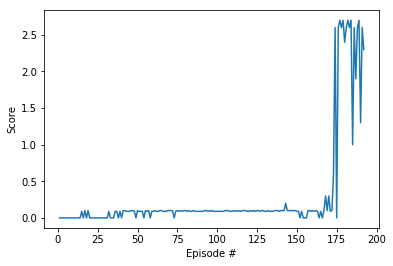

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('./Plots/Average_scores.png')
plt.show()